# Greenshoe Notebook

Import libraries

In [1]:
%matplotlib inline

from __future__ import division

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import psycopg2

from pivottablejs import pivot_ui
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database


/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Import Dataset and create dataframe

In [2]:
biodf = pd.read_csv("bio_data.csv")
loandf = pd.read_csv("loans.csv")

In [11]:
dbname = 'loandf_sqldb'
username = 'pamelaclevenger'
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))

In [12]:
print engine.url

postgres://pamelaclevenger@localhost/loandf_sqldb


In [8]:
## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

OperationalError: (psycopg2.OperationalError) could not connect to server: Connection refused
	Is the server running on host "localhost" (::1) and accepting
	TCP/IP connections on port 5432?
could not connect to server: Connection refused
	Is the server running on host "localhost" (127.0.0.1) and accepting
	TCP/IP connections on port 5432?


In [13]:
#insert data into database
loandf.to_sql('loandf_sqldb', engine, if_exists = 'replace')

In [14]:
# connect to database
con = None
con = psycopg2.connect(dbname = 'loandf_sqldb', user = 'pamelaclevenger')

In [15]:
# query LOAN database to see if stuff is in there:
sql_query = """
SELECT * FROM loandf_sqldb WHERE amount > 10;
"""
loan_data_from_sql = pd.read_sql_query(sql_query,con)

loan_data_from_sql.head()

,index,id,profile_fk,amount,paid,amount_requested,net,loan_time,loan_w,loan_month,...,loan_time_from_join,loan_time_from_join_week,loan_time_from_join_month,repay_time_from_join,repay_time_from_join_week,repay_time_from_join_month,profile_status,qualified,ctt,can_be_evaluated
0,0,22,40,900,1000,1000,100,45:30.9,12,3,...,110780.3231,1,0,1412302.489,3,0,2,1000,t,t
1,1,59,40,1980,1150,2200,-830,38:02.8,15,4,...,2165932.2660,4,1,NaN,NaN,NaN,2,1000,t,t
2,2,155277,41,300,300,300,0,34:29.6,46,11,...,20901171.8700,34,8,20902215.640,34,8,98,1000,t,t
3,3,155278,41,300,300,300,0,55:27.9,46,11,...,20902430.1800,34,8,20902511.370,34,8,98,1000,t,t
4,4,155280,41,300,300,300,0,06:12.2,46,11,...,20906674.4800,34,8,20906694.310,34,8,98,1000,t,t


In [16]:
#ledgersdf = pd.read_csv("ledgers_data.csv", sep='delimiter', header=None) # skiprows = 2) <--just skip the header #, error_bad_lines=False) <---That will skip bad lines.


In [17]:
#Pivot table of BIO dataframe
pivot_ui(biodf)

In [18]:
#Pivot table of LOAN dataframe
pivot_ui(loandf)

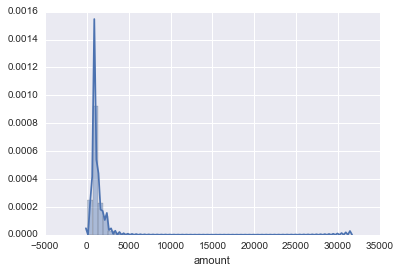

In [11]:
#Plot something in the data
# Histogram of loan amount
sns.distplot(loandf['amount']) 
plt.show()

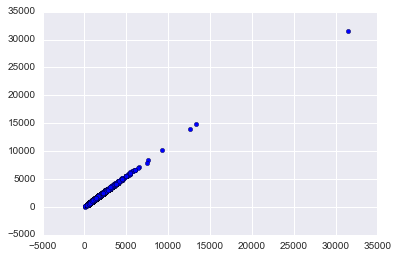

In [19]:
#Plot something else in the data
# Plot Loan amount vs. amount requested.
plt.scatter(loandf['amount'],loandf['amount_requested'])
plt.ylim(0,1000) # To zoom in closer, reduce axes
plt.xlim(0,1000) 
plt.show()

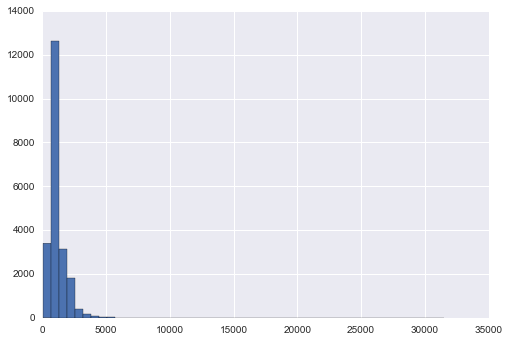

In [4]:
# Hey, David STONE just showed me that you can call the hist on the dataframe
loandf['amount'].hist(bins = 50)
plt.show()

In [23]:
# The scatterplot seemed to show that Loan Amount and Amount Requested are highly correlated
# What is the correlation coefficient?
np.corrcoef(loandf['amount'],loandf['amount_requested'])

array([[ 1.        ,  0.99868826],
       [ 0.99868826,  1.        ]])

In [ ]:
loandf_fixed = []

In [7]:
for i in loandf['amount']:
    #print loandf['amount']
    if loandf['amount'][i] > 0.5:
        if loandf['amount'][i]<1000:
            loandf_fixed.append(loandf['amount'][i])
            #print loandf['amount']
    #loandf_fixed.append(i)

loandf_fixed

KeyError: 31500

In [10]:
loandf['amount'][700]

2250

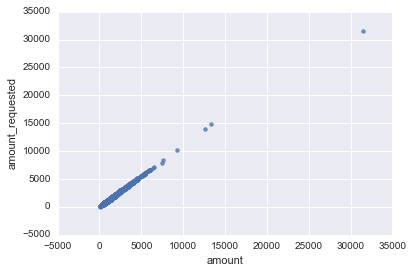

In [19]:
# Try scatterplot in seaborn
sns.regplot(loandf['amount'],loandf['amount_requested'], fit_reg = False)
plt.show()            